# Logistic Regression

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
X = np.array([[53.21, 59.93], [61.83,40.25], [31.28, 71.16], 
              [70.59, 69.66], [70.16, 80.76], [75.16, 70.5], 
              [70.16, 55.5], [71.99, 74.6], [50.67, 65.81], 
              [30.44, 73.45], [69.44, 67.02], [80.14, 65.92]])

y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1])


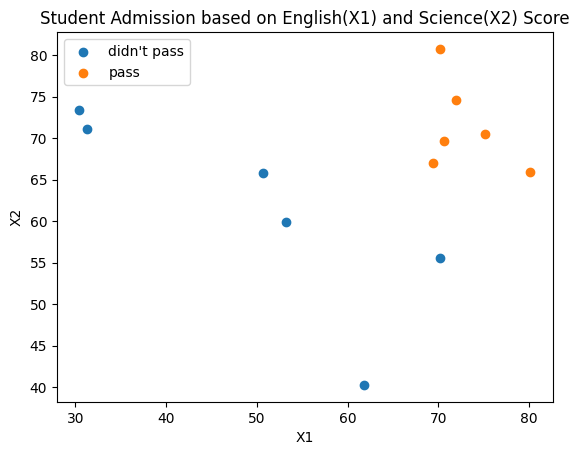

In [4]:
# Get the unique categories
categories = np.unique(y)

# Create a scatter plot for each category
for category in categories:
    mask = y == category
    if category==1:
        plt.scatter(X[mask,0], X[mask,1], label='pass')
    else:
        plt.scatter(X[mask,0], X[mask,1], label='didn\'t pass')

# Add legend, axis labels and a title
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Student Admission based on English(X1) and Science(X2) Score')

# Show the plot
plt.show()




In [5]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [6]:
def cost_function(x, y, w, b, lambda_):
   
    m,n = x.shape 
    cost = 0

    for i in range(m):
        f_wb = sigmoid(w @ x[i] + b)
        cost_i = -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
        cost = cost + cost_i
    
    w_sum = 0
    for j in range(n):
        w_j2 = w[j]**2
        w_sum += w_j2

    total_cost = 1/m * cost + lambda_/(2*n) * w_sum

    return total_cost

In [7]:
def cost_grad(x, y, w, b, lambda_):
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0.

    for i in range(m):
        f_wb = sigmoid(x[i] @ w + b)         #(n,)(n,)=scalar
        err_i  = f_wb  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
    for k in range(n):
        dj_dw[k] = dj_dw[k] + (lambda_/m) * w[k]

    return dj_db, dj_dw

In [8]:
import math
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    # number of training examples
    m = len(X)
    lambda_ = 1
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<200000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print("Iteration {:4}: Cost {:8.2f}   ".format(i, float(J_history[-1])))
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [9]:
initial_w = np.array([0,0])
initial_b = 0

# Some gradient descent settings
iterations = 150000
alpha = 0.001

w,b, J_history,w_hostory = gradient_descent(X , y, initial_w, initial_b, 
                                   cost_function, cost_grad, alpha, iterations, lambda_=0)

print("w = {} , b = {}".format(w, b))

Iteration    0: Cost     0.69   
Iteration 15000: Cost     0.58   
Iteration 30000: Cost     0.54   
Iteration 45000: Cost     0.51   
Iteration 60000: Cost     0.48   
Iteration 75000: Cost     0.45   
Iteration 90000: Cost     0.43   
Iteration 105000: Cost     0.41   
Iteration 120000: Cost     0.39   
Iteration 135000: Cost     0.37   
Iteration 149999: Cost     0.35   
w = [0.07723534 0.02401079] , b = -6.231599893686205


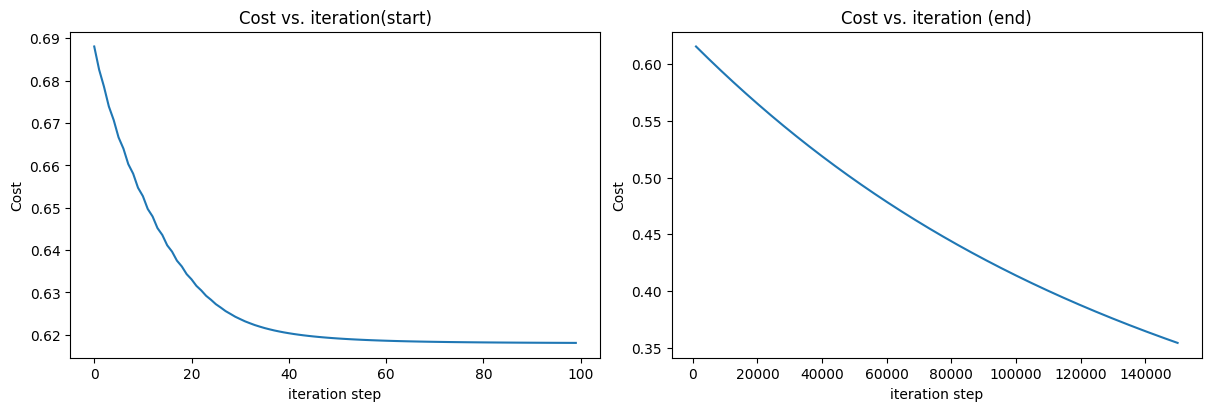

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:100])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression()
Log_reg.fit(X, y)
coef_ = Log_reg.coef_
int_ = Log_reg.intercept_

In [12]:
print(coef_[0,0], coef_[0,1])
print(int_[0])

0.3479020581531303 0.5476265724992767
-57.89140664513924


In [19]:
X_test = np.array([[69.63, 66.40]])
Log_reg.predict(X_test)

array([1])